In [20]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

%matplotlib inline

In [7]:
filename = 'data/digits/train.csv'
with open(filename) as f:
    lines = f.readlines()

In [15]:
labels = [line.split(',')[0] for line in lines[1:]]
digits = [[int(d) for d in line.split(',')[1:]] for line in lines[1:]]

In [23]:
print(labels[3])
print(digits[3])


4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 220, 179, 6, 0, 0, 0, 0, 0, 0, 0, 0, 9, 77, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 247, 17, 0, 0, 0, 0, 0, 0, 0, 0, 27, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 242, 155, 0, 0, 0, 0, 0, 0, 0, 0, 27, 254, 63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 160, 207, 6, 0, 0, 0, 0, 0, 0, 0, 27, 254, 65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 127, 254, 21, 0, 0, 0, 0, 0, 0, 0, 20, 239, 65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 77, 254, 21, 0, 0, 0, 0, 0, 0, 0, 0, 195, 65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 70, 254,

In [36]:
def plot_digit(d):
    picture = np.array(digits[d]).reshape((28, 28))
    img = Image.fromarray(picture)
    plt.title(labels[d])
    plt.imshow(picture)
    
    return None

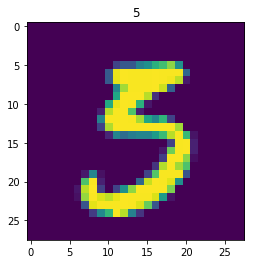

In [38]:
plot_digit(456)